In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
import torch.optim as optim
from sklearn.metrics import accuracy_score

In [53]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
X = torch.from_numpy(X).float()
y = torch.LongTensor(y)
X.shape, y.shape

(torch.Size([569, 30]), torch.Size([569]))

In [5]:
x = torch.Tensor([1,2,3])
softmax = nn.Softmax()
softmax(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


tensor([0.0900, 0.2447, 0.6652])

In [8]:
X = (X- X.mean(dim = 0)) / X.std(dim = 0)
model = nn.Sequential(nn.Linear(X.shape[1], 32), 
                      nn.ReLU(), 
                      nn.Linear(32, 2), 
                      nn.LogSoftmax(dim=1)) # LogSoftmax = log(Softmax) 
model(X)

tensor([[-0.5039, -0.9268],
        [-0.4918, -0.9455],
        [-0.6081, -0.7861],
        ...,
        [-0.6025, -0.7929],
        [-0.8339, -0.5698],
        [-0.4366, -1.0391]], grad_fn=<LogSoftmaxBackward>)

In [9]:
X = X[:2, :]
y =y[:2]
y

tensor([0, 0])

In [10]:
out = model(X)
out

tensor([[-0.5039, -0.9268],
        [-0.4918, -0.9455]], grad_fn=<LogSoftmaxBackward>)

In [11]:
nn.NLLLoss()(out, y) # потеря

tensor(0.4978, grad_fn=<NllLossBackward>)

In [12]:
model = nn.Sequential(nn.Linear(X.shape[1], 32), 
                      nn.ReLU(), 
                      nn.Linear(32, 2))
out = model(X)
print(out)
nn.CrossEntropyLoss()(out, y) # (прогноз нашей модели, номера правильных классов)

tensor([[ 0.9516, -0.0151],
        [ 0.3467,  0.0400]], grad_fn=<AddmmBackward>)


tensor(0.4369, grad_fn=<NllLossBackward>)

In [ ]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
X = torch.from_numpy(X).float()
y = torch.LongTensor(y)
X = (X- X.mean(dim = 0)) / X.std(dim = 0)

# 1 шаг. Данные
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size = 64, shuffle = True) # shuffle перемешивает данные

# 2 шан. Модель
model = nn.Sequential(nn.Linear(X.shape[1], 32), 
                      nn.ReLU(), 
                      nn.Linear(32, 16),
                      nn.ReLU(), 
                      nn.Linear(16, 2))

# 3 шаг. loss and optimizer
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

# 4 шаг. learning
for epoch in range(10):
  for X_batch, y_batch in dataloader:
    #forward
    out = model(X_batch)
    #loss
    batch_loss = loss(out, y_batch)
    #backward
    batch_loss.backward()
    #optimazer
    optimizer.step()
    optimizer.zero_grad()
    print(batch_loss.item())

0.679894208908081
0.66647869348526
0.676118791103363
0.6521480679512024
0.6370909214019775
0.6444107294082642
0.6100502014160156
0.6264352798461914
0.6185264587402344
0.594864010810852
0.586506724357605
0.5957027673721313
0.5709904432296753
0.5629332661628723
0.5696387887001038
0.5442181825637817
0.5342571139335632
0.535182535648346
0.5523566603660583
0.5015377402305603
0.48274096846580505
0.49137088656425476
0.4737515449523926
0.4808666706085205
0.44317251443862915
0.47591882944107056
0.4275436997413635
0.4351194202899933
0.384817898273468
0.4520593583583832
0.40751713514328003
0.4128548502922058
0.379559189081192
0.38427597284317017
0.3234793543815613
0.34203821420669556
0.3308803141117096
0.32976034283638
0.34571459889411926
0.3206111192703247
0.30442699790000916
0.31752121448516846
0.2928224802017212
0.22962668538093567
0.29067349433898926
0.25938624143600464
0.32090073823928833
0.20757251977920532
0.28727301955223083
0.24155795574188232
0.23318418860435486
0.20246648788452148
0.18

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('diabetes.csv')
# X = torch.Tensor(data.drop('Outcome', axis = 1).values).float()
# y = torch.Tensor(data.drop('Outcome', axis = 1).values).float()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Корреляция количественных признаков')

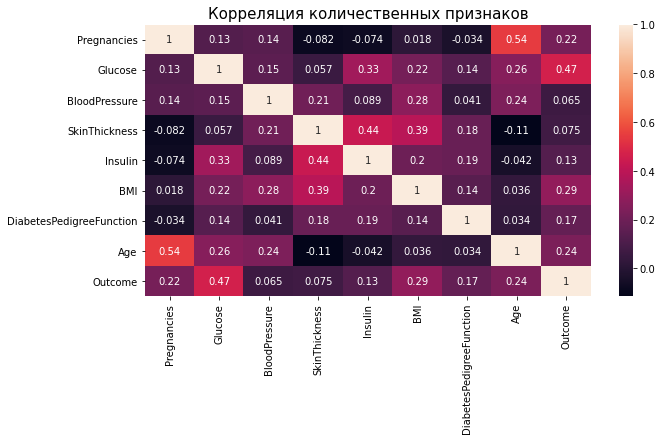

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True)
plt.title('Корреляция количественных признаков', fontsize = 15)
# Высокой корреляии данных не наблюдается

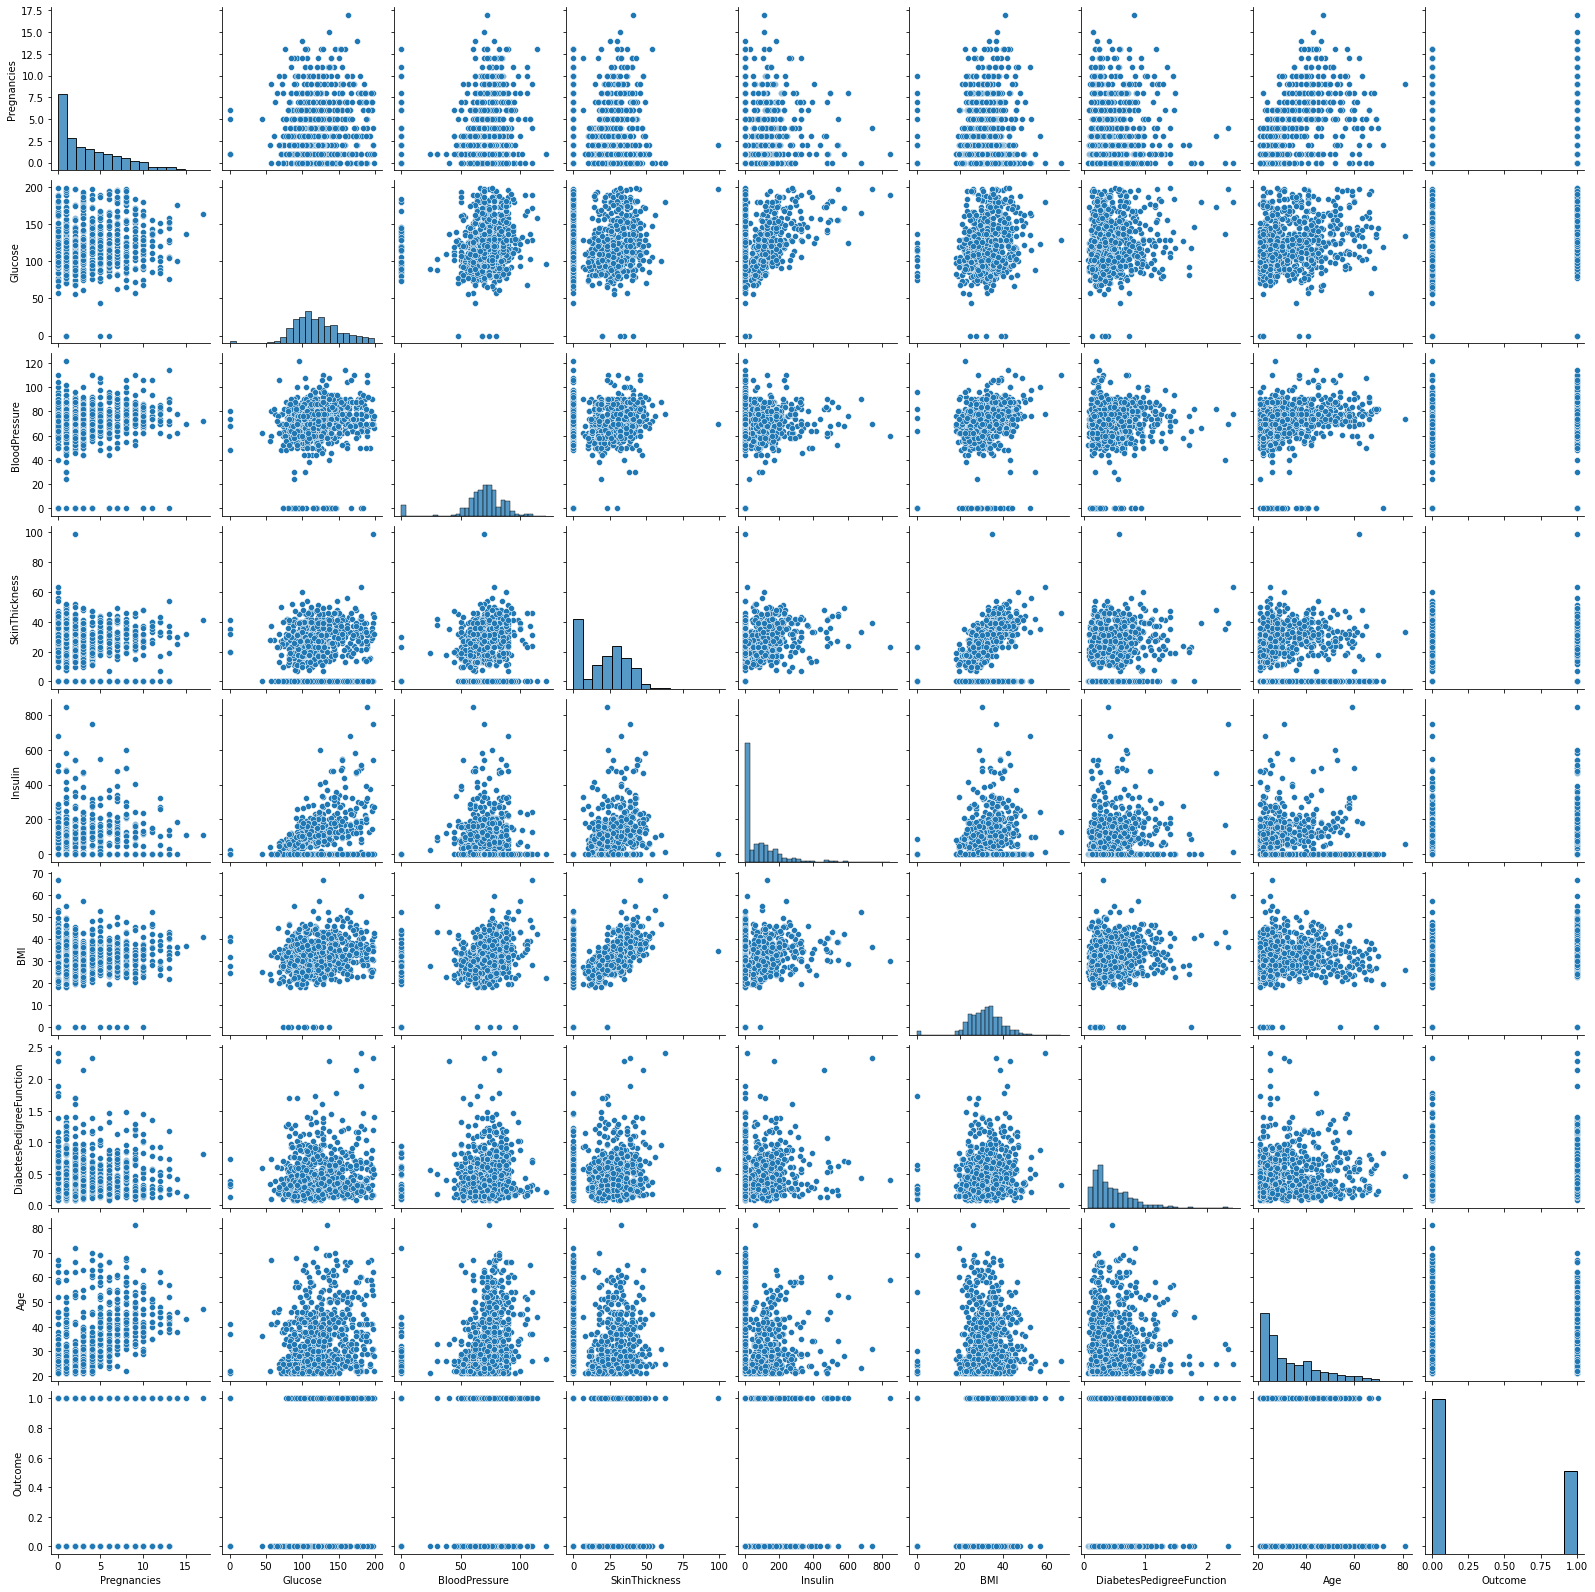

In [11]:
sns.pairplot(df, kind = "scatter")#, plot_kws = dict(s=100, edgecolor="white", linewidth = 2.5))

In [12]:
for col in df.columns:
  print(f'Количество уникальных значений поля {col} = {df[col].nunique()}')
  print('Уникальные значения:')
  print(df[col].value_counts())

Количество уникальных значений поля Pregnancies = 17
Уникальные значения:
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
Количество уникальных значений поля Glucose = 136
Уникальные значения:
100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64
Количество уникальных значений поля BloodPressure = 47
Уникальные значения:
70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95    

In [13]:
## target не является сбалансированным

In [231]:
# модель
class ModelDiabets(nn.Module):
  def __init__(self, input_size, hidden_size, n_classes):
      super().__init__()
      # слои:
      self.bn1 = nn.BatchNorm1d(input_size)
      self.fc1 = nn.Linear(input_size, hidden_size)
      self.bn2 = nn.BatchNorm1d(hidden_size)
      self.fc2 = nn.Linear(hidden_size, int(hidden_size/4))
      self.fc3 = nn.Linear(int(hidden_size/4), n_classes)
      # функции активации:
      self.sigmoid = nn.Sigmoid()
      self.relu = nn.ReLU()
      self.tanh = nn.Tanh()

  def forward(self, X):
    out = self.relu(self.fc1(self.bn1(X)))
    out = self.relu(self.fc2(self.bn2(out)))
    out = self.fc3(out)
    return out

In [269]:
%%time
# Данные
X = torch.Tensor(df.drop('Outcome', axis = 1).values).float()
y = torch.LongTensor(df[['Outcome']].values)
dataset = TensorDataset(X, y)

train_size = int(np.floor(len(dataset)*0.8))
test_size = len(dataset) - train_size 

dataset_train, dataset_test = random_split(dataset, [train_size, test_size]) # Разделение на тренировчоную и тестовую выборки

data_train = DataLoader(dataset_train, batch_size = 64, shuffle = True)
data_test = DataLoader(dataset_test, batch_size = len(dataset_test), shuffle = True)

device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

n_featers = X.shape[1]
hidden_size = 44
n_classes = int(df['Outcome'].nunique()) # количество классов

# Основа (модель, ф. ошибки, оптимизаторы, *накопители)
model = ModelDiabets(n_featers, hidden_size, n_classes).to(device)
loss = nn.CrossEntropyLoss()
optimizare = optim.Adam(model.parameters(), lr = 0.001)

history_loss = list()
history_accuracy = list()
loss_history_test = list()

n_epochs = 30 + 1
epochs = list() 

# Обучение
for epoch in range (1, n_epochs):
  batch_loss = 0
  correct_samples = 0
  train_len = 0
  batch_acc = 0
  for X_train, y_train in data_train:
    X_train, y_train = X_train.to(device), y_train.to(device)
    out = model(X_train)

    cur_loss = loss(out, y_train.squeeze())
    batch_loss += cur_loss
    
    cur_loss.backward()
    
    optimizare.step()
    optimizare.zero_grad()

    batch_acc += accuracy_score(y_train.to('cpu').squeeze(), torch.max(out.to('cpu').detach(), 1)[1])

  with torch.no_grad(): #можно так делать?
    for X_test, y_test in data_test:
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_pred = model(X_test)
      batch_loss_test = loss(y_pred, y_test.squeeze())
  # history_loss.append(batch_loss)
  # history_accuracy.append(batch_acc/len(data_train))
  # epochs.append(epoch)
  
  if epoch % 3 == 0:
    history_loss.append(batch_loss)
    history_accuracy.append(batch_acc/len(data_train))
    loss_history_test.append(batch_loss_test)  
    epochs.append(epoch)
    print(f'epoch: [{epoch}/{n_epochs-1}]: loss_train = {history_loss[-1]}; loss_test = {loss_history_test[-1]}; acc_train = {history_accuracy[-1]}')

epoch: [3/30]: loss_train = 5.188265800476074; loss_test = 0.5229470729827881; acc_train = 0.7486842105263157
epoch: [6/30]: loss_train = 4.6428070068359375; loss_test = 0.4969870448112488; acc_train = 0.7805921052631579
epoch: [9/30]: loss_train = 4.65202522277832; loss_test = 0.487848699092865; acc_train = 0.7518914473684211
epoch: [12/30]: loss_train = 4.493510723114014; loss_test = 0.48521679639816284; acc_train = 0.7726973684210526
epoch: [15/30]: loss_train = 4.534749984741211; loss_test = 0.4827616810798645; acc_train = 0.7704769736842105
epoch: [18/30]: loss_train = 4.516237735748291; loss_test = 0.4810352921485901; acc_train = 0.7826480263157894
epoch: [21/30]: loss_train = 4.505829811096191; loss_test = 0.47978314757347107; acc_train = 0.7657894736842106
epoch: [24/30]: loss_train = 4.43351936340332; loss_test = 0.4786929488182068; acc_train = 0.7805098684210526
epoch: [27/30]: loss_train = 4.3633551597595215; loss_test = 0.48341482877731323; acc_train = 0.7783717105263157
ep

In [277]:
# GPU ~ 27.9 s
# CPU ~ 22.1 s
# EPOCHS = 1000
# Надо смотреть на больших данных

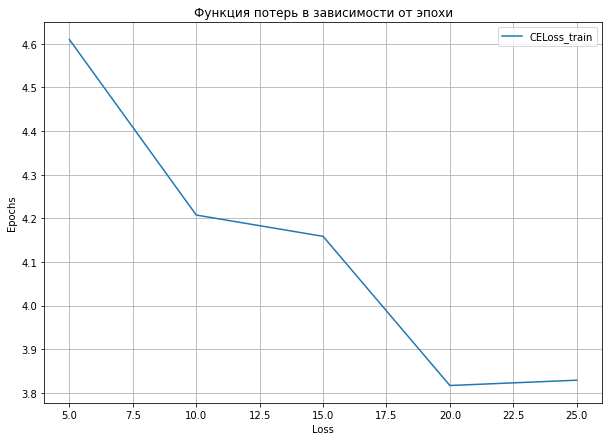

In [204]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(epochs, history_loss, label = 'CELoss_train')
plt.title('Функция потерь в зависимости от эпохи')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.grid(True)

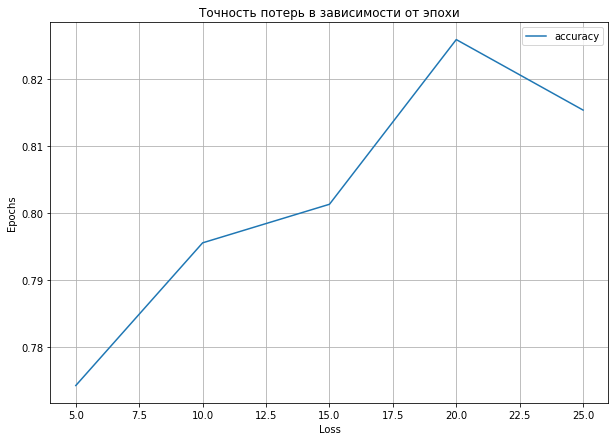

In [205]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(epochs, history_accuracy, label = 'accuracy')
plt.title('Точность потерь в зависимости от эпохи')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.grid(True)

In [270]:
for X_test, y_test in data_test:
  X_test, y_test = X_test.to(device), y_test.to(device)
  predict = model(X_test)
print(f"accuracy {accuracy_score(y_test.to('cpu').squeeze(), torch.max(predict.to('cpu').detach(), 1)[1])}")

accuracy 0.8116883116883117


4.3 Решить задачу классификации.

1. Считать данные из файла mobile_prices.csv
2. Провести EDA
3. Разбить данные на обучающую и тестовую выборку
4. Обучить классификатор. Вывести графики функции потерь и точности
5. Измерить точность на тестовой выборке
6. Обучить модель, используя GPU. Сравнить время выполнения с и без GPU.


In [278]:
df = pd.read_csv('mobiles_data.csv')
# X = torch.Tensor(data.drop('Outcome', axis = 1).values).float()
# y = torch.Tensor(data.drop('Outcome', axis = 1).values).float()
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [279]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [281]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Text(0.5, 1.0, 'Корреляция количественных признаков')

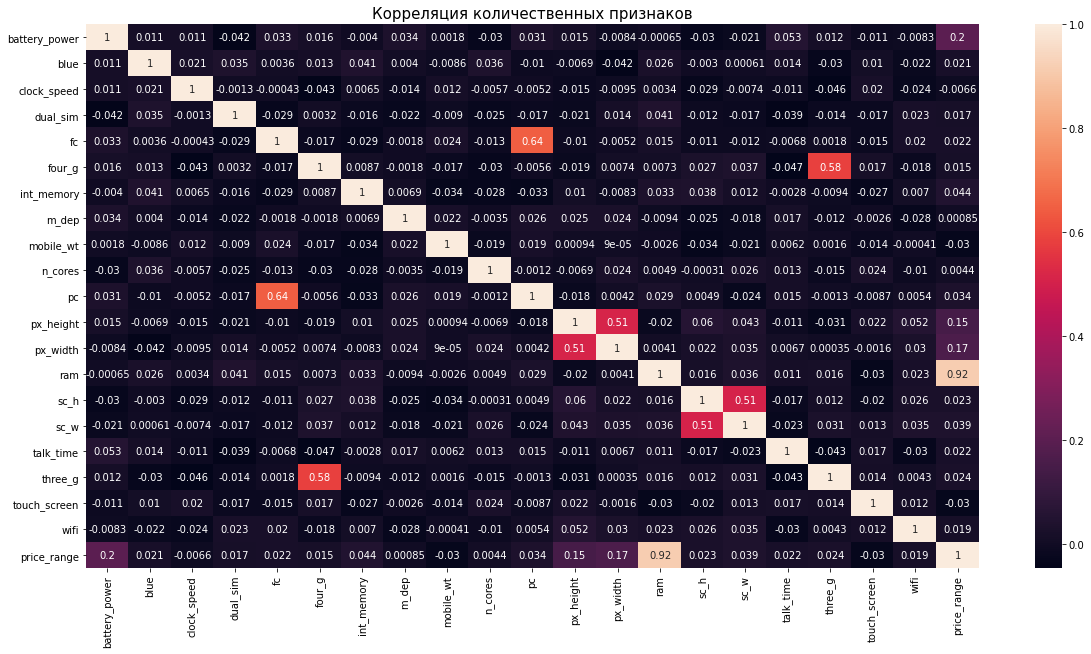

In [284]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)
plt.title('Корреляция количественных признаков', fontsize = 15)
# Высокой корреляии данных не наблюдается

In [286]:
for col in df.columns:
  print(f'Количество уникальных значений поля {col} = {df[col].nunique()}')
  print('Уникальные значения:')
  print(df[col].value_counts())

Количество уникальных значений поля battery_power = 1094
Уникальные значения:
1589    6
618     6
1872    6
1379    5
1310    5
       ..
1072    1
1073    1
1074    1
1075    1
1998    1
Name: battery_power, Length: 1094, dtype: int64
Количество уникальных значений поля blue = 2
Уникальные значения:
0    1010
1     990
Name: blue, dtype: int64
Количество уникальных значений поля clock_speed = 26
Уникальные значения:
0.5    413
2.8     85
2.3     78
1.6     76
2.1     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
1.8     62
2.9     62
1.0     61
1.7     60
2.2     59
0.8     58
2.4     58
0.9     58
1.2     56
2.7     55
2.6     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64
Количество уникальных значений поля dual_sim = 2
Уникальные значения:
1    1019
0     981
Name: dual_sim, dtype: int64
Количество уникальных значений поля fc = 20
Уникальные значения:
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     1

In [332]:
# модель
class ModelDiabets(nn.Module):
  def __init__(self, input_size, hidden_size, n_classes):
      super().__init__()
      # слои:
      self.bn1 = nn.BatchNorm1d(input_size)
      self.fc1 = nn.Linear(input_size, hidden_size)
      self.bn2 = nn.BatchNorm1d(hidden_size)
      self.fc2 = nn.Linear(hidden_size, int(hidden_size/4))
      #self.bn3 = nn.BatchNorm1d(int(hidden_size/4))
      self.fc3 = nn.Linear(int(hidden_size/4), n_classes)
      #self.fc4 = nn.Linear(int(hidden_size/8), n_classes)

      # функции активации:
      self.sigmoid = nn.Sigmoid()
      self.relu = nn.ReLU()
      self.tanh = nn.Tanh()

  def forward(self, X):
    out = self.relu(self.fc1(self.bn1(X)))
    out = self.relu(self.fc2(self.bn2(out)))
    #out = self.relu(self.fc3(self.bn3(out)))
    out = self.fc3(out)
    return out

In [335]:
%%time
# Данные
X = torch.Tensor(df.drop('price_range', axis = 1).values).float()
y = torch.LongTensor(df[['price_range']].values)
dataset = TensorDataset(X, y)

train_size = int(np.floor(len(dataset)*0.8))
test_size = len(dataset) - train_size 

dataset_train, dataset_test = random_split(dataset, [train_size, test_size]) # Разделение на тренировчоную и тестовую выборки

data_train = DataLoader(dataset_train, batch_size = 64, shuffle = True)
data_test = DataLoader(dataset_test, batch_size = len(dataset_test), shuffle = True)

device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

n_featers = X.shape[1]
hidden_size = 64
n_classes = int(df['price_range'].nunique()) # количество классов

# Основа (модель, ф. ошибки, оптимизаторы, *накопители)
model = ModelDiabets(n_featers, hidden_size, n_classes).to(device)
loss = nn.CrossEntropyLoss()
optimizare = optim.Adam(model.parameters(), lr = 0.001)

history_loss = list()
history_accuracy = list()
loss_history_test = list()

n_epochs = 12 + 1
epochs = list() 

# Обучение
for epoch in range (1, n_epochs):
  batch_loss = 0
  correct_samples = 0
  train_len = 0
  batch_acc = 0
  for X_train, y_train in data_train:
    X_train, y_train = X_train.to(device), y_train.to(device)
    out = model(X_train)

    cur_loss = loss(out, y_train.squeeze())
    batch_loss += cur_loss
    
    cur_loss.backward()
    
    optimizare.step()
    optimizare.zero_grad()

    batch_acc += accuracy_score(y_train.to('cpu').squeeze(), torch.max(out.to('cpu').detach(), 1)[1])

  with torch.no_grad(): #можно так делать?
    for X_test, y_test in data_test:
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_pred = model(X_test)
      batch_loss_test = loss(y_pred, y_test.squeeze())
  # history_loss.append(batch_loss)
  # history_accuracy.append(batch_acc/len(data_train))
  # epochs.append(epoch)
  
  #if epoch % 3 == 0:
  history_loss.append(batch_loss)
  history_accuracy.append(batch_acc/len(data_train))
  loss_history_test.append(batch_loss_test)  
  epochs.append(epoch)
  print(f'epoch: [{epoch}/{n_epochs-1}]: loss_train = {history_loss[-1]}; loss_test = {loss_history_test[-1]}; acc_train = {history_accuracy[-1]}')

epoch: [1/12]: loss_train = 34.166297912597656; loss_test = 1.3016598224639893; acc_train = 0.325625
epoch: [2/12]: loss_train = 30.37267303466797; loss_test = 1.1422665119171143; acc_train = 0.555625
epoch: [3/12]: loss_train = 25.22188949584961; loss_test = 0.923967182636261; acc_train = 0.64
epoch: [4/12]: loss_train = 20.117691040039062; loss_test = 0.7596061825752258; acc_train = 0.650625
epoch: [5/12]: loss_train = 16.96503257751465; loss_test = 0.65753173828125; acc_train = 0.686875
epoch: [6/12]: loss_train = 14.78768539428711; loss_test = 0.5741713047027588; acc_train = 0.765625
epoch: [7/12]: loss_train = 12.809025764465332; loss_test = 0.48965567350387573; acc_train = 0.8125
epoch: [8/12]: loss_train = 11.41363525390625; loss_test = 0.4097175598144531; acc_train = 0.838125
epoch: [9/12]: loss_train = 8.765637397766113; loss_test = 0.33636510372161865; acc_train = 0.89375
epoch: [10/12]: loss_train = 7.141012191772461; loss_test = 0.2762984037399292; acc_train = 0.915
epoch: 

In [336]:
for X_test, y_test in data_test:
  X_test, y_test = X_test.to(device), y_test.to(device)
  predict = model(X_test)
print(f"accuracy {accuracy_score(y_test.to('cpu').squeeze(), torch.max(predict.to('cpu').detach(), 1)[1])}")

accuracy 0.935


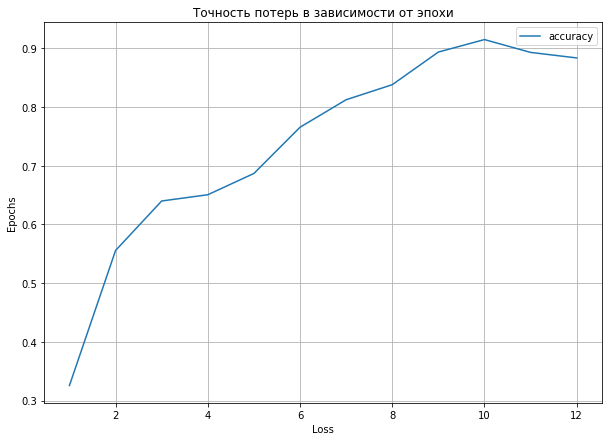

In [337]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(epochs, history_accuracy, label = 'accuracy')
plt.title('Точность потерь в зависимости от эпохи')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.grid(True)

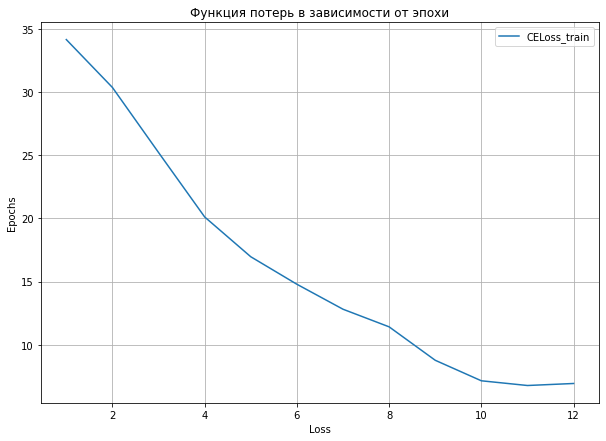

In [338]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(epochs, history_loss, label = 'CELoss_train')
plt.title('Функция потерь в зависимости от эпохи')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.grid(True)